# Script Práctica 2 Parte 2 (Clasificación imágenes)

Redes de Neuronas Artificiales, curso 2022-2023

Universidad Carlos III de Madrid

# Importar TensorFlow, ciertos módulos de Keras y las librerías numpy y pandas.

In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Descargar y observar el dataset

In [50]:
# Descarga del dataset
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()
# Nombre semántico de las clases
class_names={0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
             5: 'Sandal',  6: 'Shirt',   7: 'Sneaker',  8: 'Bag',   9: 'Ankle Boot'}

In [51]:
#DIMENSION DE LOS DATOS
print("Dimensiones train_images")
print(train_images.shape)
print("Dimensiones test_images")
print(test_images.shape)
print("Dimensiones train_labels")
print(train_labels.shape)
print("Dimensiones test_labels")
print(test_labels.shape)

# OBTENER NUMERO DE CLASES
num_clases=len(np.unique(train_labels))
print("Número de clases")
print(num_clases)

#NUMERO DE PATRONES POR CLASE
print("Número patrones train")
print(pd.DataFrame(train_labels).value_counts())
print("Número patrones test")
print(pd.DataFrame(test_labels).value_counts())

Dimensiones train_images
(60000, 28, 28)
Dimensiones test_images
(10000, 28, 28)
Dimensiones train_labels
(60000,)
Dimensiones test_labels
(10000,)
Número de clases
10
Número patrones train
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64
Número patrones test
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64


Observando contenido patrones

In [52]:
# Observar datos de un patrón (pixeles)
print("Contenido patrón 3 train")
print(train_images[3])
print("Contenido patrón 3 test")
print(train_labels[3])

Contenido patrón 3 train
[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179
  186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152
  148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140
  137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131
  131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119
  140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117
  127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119
  127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 1

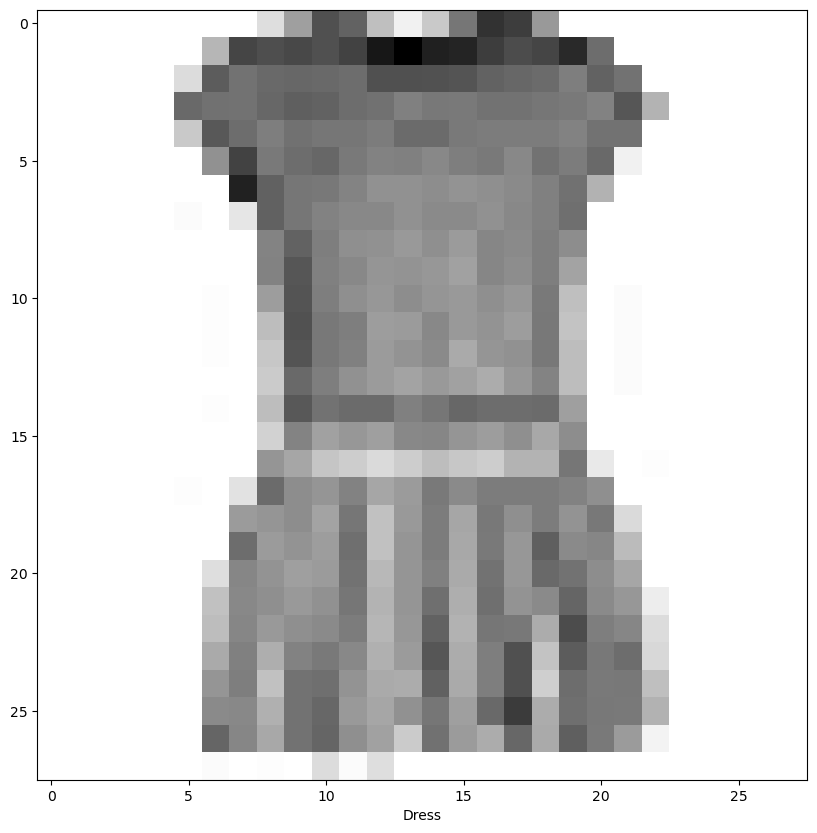

In [53]:
# Pintando el patrón 3 train
plt.figure(figsize=(10,10))
plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[3]])
plt.show()

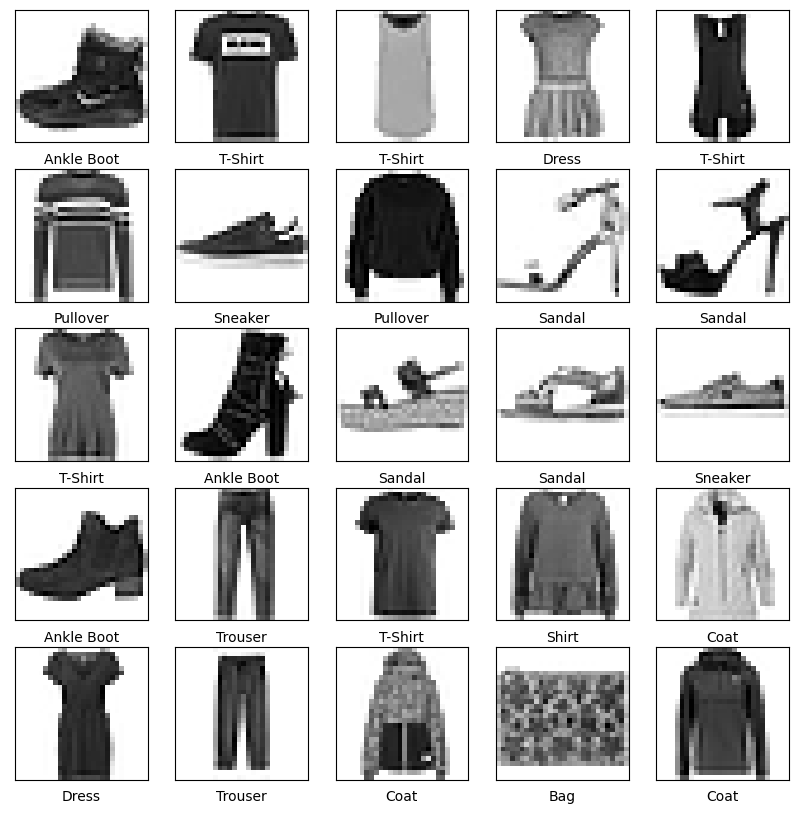

In [54]:
# VER ALGUNAS IMÁGENES. LAS 25 PRIMERAS DEL CONJUNTO DE ENTRENAMIENTO
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Definición modelo

In [55]:
# Definición de la semilla
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed

semilla=1
seed(semilla)
set_random_seed(semilla)

In [56]:
# Guardar el checkpoint del mejor modelo
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel', monitor='val_loss',
                             mode='min',
                             verbose=1,
                             save_best_only=True)
callbacks_list = [checkpoint]

Definir un modelo con Perceptrón Multicapa MLP
- https://keras.io/api/layers/normalization_layers/batch_normalization/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/layers/reshaping_layers/flatten/
- https://keras.io/api/layers/core_layers/dense/

In [57]:
#DEFINICIÓN DE UN PM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Flatten

model_pm = Sequential()
model_pm.add(BatchNormalization(input_shape=(28,28)))
model_pm.add(Flatten(input_shape=(28,28)))
model_pm.add(Dense(100, activation='relu'))
model_pm.add(Dropout(0.25))
model_pm.add(Dense(100, activation='relu'))
model_pm.add(Dropout(0.25))
model_pm.add(Dense(num_clases, activation='softmax'))

model_pm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 28, 28)           112       
 hNormalization)                                                 
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                      

CNN. Enlaces a la librería
- https://keras.io/api/layers/normalization_layers/batch_normalization/
- https://keras.io/api/layers/convolution_layers/convolution2d/
- https://keras.io/api/layers/pooling_layers/max_pooling2d/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/layers/reshaping_layers/flatten/
- https://keras.io/api/layers/core_layers/dense/

Ejemplo CNN Conv2D + ilustrando los feature map

1/1 [==============================] - 0s 52ms/step


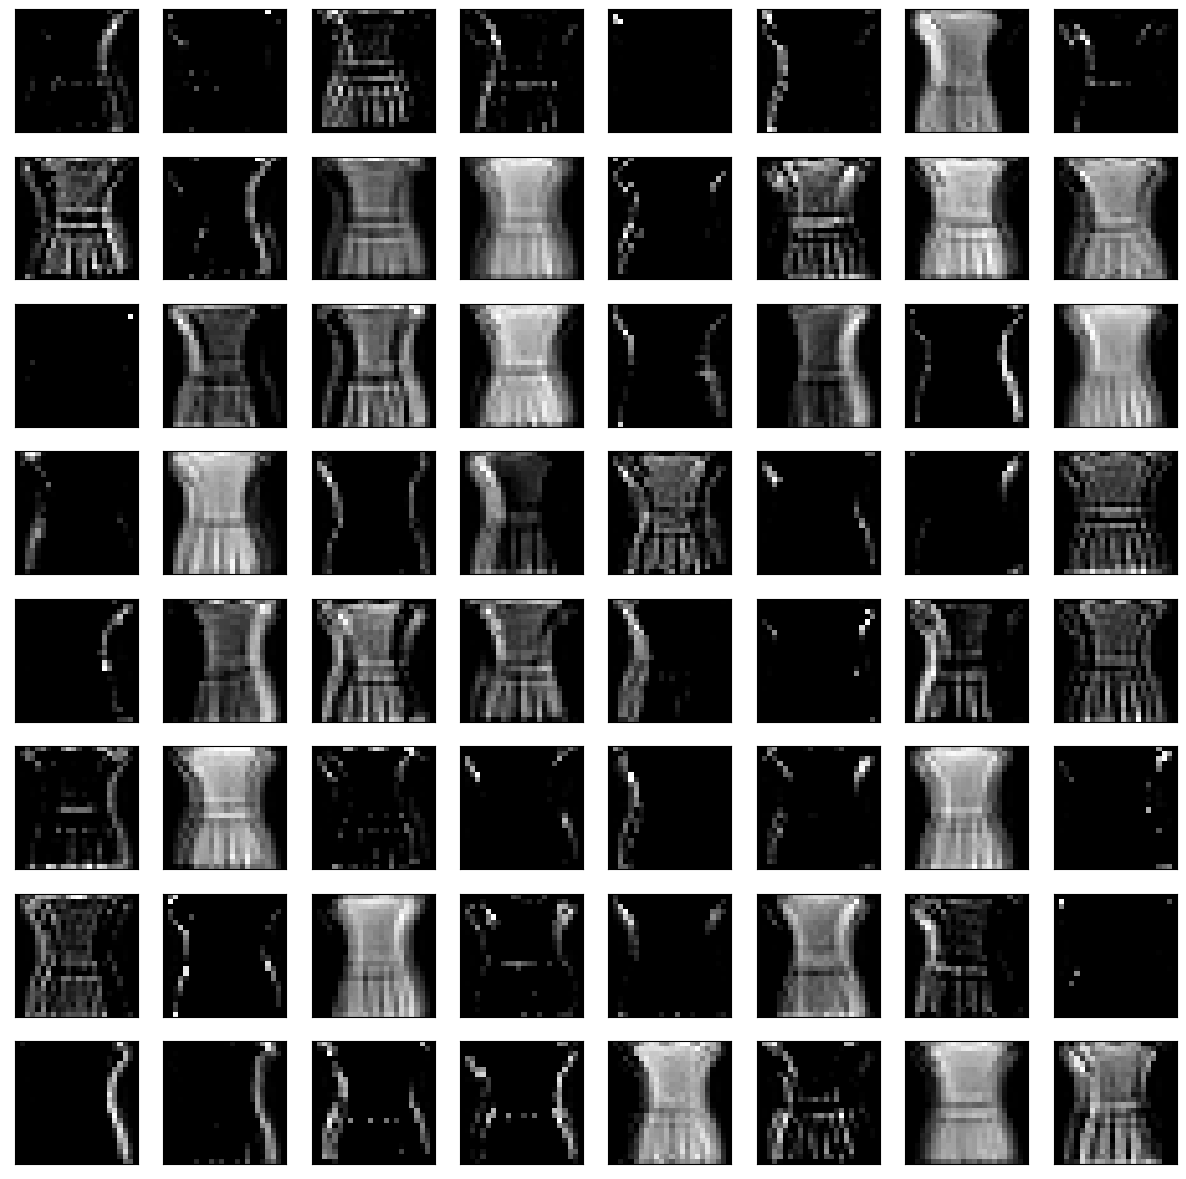

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
# Se define un modelo con una única capa de Conv2D. Aplica 64 filtros, con kernel tamaño 5x5
model_cnn = Sequential()
model_cnn.add(Conv2D(input_shape=(28,28,1), filters=64, kernel_size=(5, 5), activation='relu'))
# Se aplica el modelo sobre la imagen 3 de train
data = np.array([train_images[3]])
feature_map = model_cnn.predict(data)

# Se ilustran todos los feature maps obtenidos
plt.figure(figsize=(15,15))
for i in range(64):
  ax = plt.subplot(8,8,i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  feature_img = feature_map[0,:,:,i]
  plt.imshow(feature_img, cmap="gray")
plt.show()

In [59]:
#DEFINICIÓN DE UNA CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten

model_cnn= Sequential()
model_cnn.add(BatchNormalization(input_shape=(28,28,1)))
model_cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu')) # En la imagen pone 356, está mal.
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_clases, activation='softmax'))

model_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 128)       

In [60]:
model_cnn.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.9),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

In [61]:
model_pm.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

# Entrenar y obtener resultados

In [62]:
historico_cnn = model_cnn.fit(train_images, train_labels, epochs=10, validation_freq=1, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/10
1499/1500 [============================>.] - ETA: 0s - loss: 2944318.7500 - sparse_categorical_accuracy: 0.0990
Epoch 1: val_loss improved from inf to 2.40468, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII\bestmodel


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/PARTEII\bestmodel\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/PARTEII\bestmodel\assets


1500/1500 [==============================] - 72s 48ms/step - loss: 2942355.7500 - sparse_categorical_accuracy: 0.0990 - val_loss: 2.4047 - val_sparse_categorical_accuracy: 0.1027
Epoch 2/10
1499/1500 [============================>.] - ETA: 0s - loss: 2.3930 - sparse_categorical_accuracy: 0.0996
Epoch 2: val_loss improved from 2.40468 to 2.39031, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII\bestmodel


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/PARTEII\bestmodel\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/PARTEII\bestmodel\assets


1500/1500 [==============================] - 71s 47ms/step - loss: 2.3931 - sparse_categorical_accuracy: 0.0996 - val_loss: 2.3903 - val_sparse_categorical_accuracy: 0.1003
Epoch 3/10
1500/1500 [==============================] - ETA: 0s - loss: 2.4006 - sparse_categorical_accuracy: 0.0982
Epoch 3: val_loss improved from 2.39031 to 2.34805, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII\bestmodel


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/PARTEII\bestmodel\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/PARTEII\bestmodel\assets


1500/1500 [==============================] - 74s 50ms/step - loss: 2.4006 - sparse_categorical_accuracy: 0.0982 - val_loss: 2.3481 - val_sparse_categorical_accuracy: 0.1027
Epoch 4/10
1500/1500 [==============================] - ETA: 0s - loss: 2.3965 - sparse_categorical_accuracy: 0.1019
Epoch 4: val_loss did not improve from 2.34805
1500/1500 [==============================] - 72s 48ms/step - loss: 2.3965 - sparse_categorical_accuracy: 0.1019 - val_loss: 2.4531 - val_sparse_categorical_accuracy: 0.1003
Epoch 5/10
1500/1500 [==============================] - ETA: 0s - loss: 2.3993 - sparse_categorical_accuracy: 0.0988
Epoch 5: val_loss did not improve from 2.34805
1500/1500 [==============================] - 72s 48ms/step - loss: 2.3993 - sparse_categorical_accuracy: 0.0988 - val_loss: 2.3690 - val_sparse_categorical_accuracy: 0.1003
Epoch 6/10
1500/1500 [==============================] - ETA: 0s - loss: 2.3991 - sparse_categorical_accuracy: 0.1030
Epoch 6: val_loss did not improve fr

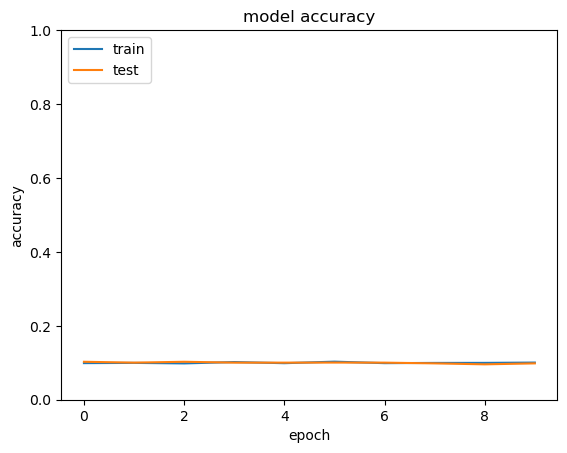

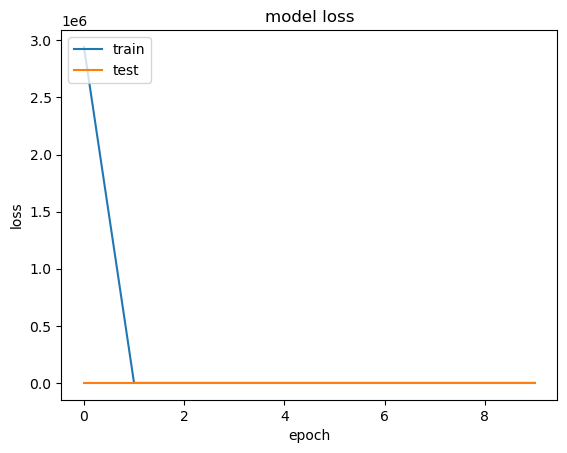

In [63]:
# GRAFICOS DE EVOLUCIÓN PARA la CNN
from matplotlib import pyplot as plt
plt.plot(historico_cnn.history['sparse_categorical_accuracy'])
plt.plot(historico_cnn.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

plt.plot(historico_cnn.history['loss'])
plt.plot(historico_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
#MEJOR ÉPOCA, LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA CHECKPOINT PARA LA CNN
epochs_stop=np.where(historico_cnn.history['val_loss'] == np.min(historico_cnn.history['val_loss']))
final_epoch=epochs_stop[0][0]
print(final_epoch)
print(historico_cnn.history['loss'][final_epoch-1])
print(historico_cnn.history['val_loss'][final_epoch-1])
print(historico_cnn.history['sparse_categorical_accuracy'][final_epoch-1])
print(historico_cnn.history['val_sparse_categorical_accuracy'][final_epoch-1])

2
2.393087387084961
2.390310287475586
0.09962499886751175
0.1003333330154419


In [65]:
"""#DEFINICIÓN, COMPILACIÓN, ENTRENAMIENTO DEL MEJOR MODELO PM CON LOS MEJORES HIPERPARÁMETROS
# Se supone que es el siguiente modelo
lr = 0.001
epochs = 4

model_cnn= Sequential()
model_cnn.add(BatchNormalization(input_shape=(28,28,1)))
model_cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu')) # En la imagen pone 356, está mal.
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_clases, activation='softmax'))

model_cnn.summary()

model_cnn.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

historico_cnn = model_cnn.fit(train_images, train_labels, epochs=epochs)"""

"#DEFINICIÓN, COMPILACIÓN, ENTRENAMIENTO DEL MEJOR MODELO PM CON LOS MEJORES HIPERPARÁMETROS\n# Se supone que es el siguiente modelo\nlr = 0.001\nepochs = 4\n\nmodel_cnn= Sequential()\nmodel_cnn.add(BatchNormalization(input_shape=(28,28,1)))\nmodel_cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))\nmodel_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))\nmodel_cnn.add(Dropout(0.25))\n\nmodel_cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))\nmodel_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))\nmodel_cnn.add(Dropout(0.25))\n\nmodel_cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))\nmodel_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))\nmodel_cnn.add(Dropout(0.25))\n\nmodel_cnn.add(Flatten())\nmodel_cnn.add(Dense(256, activation='relu')) # En la imagen pone 356, está mal.\nmodel_cnn.add(Dropout(0.5))\nmodel_cnn.add(Dense(num_clases, activation='softmax'))\n\nmodel_cnn.summary()\n\nmodel_cnn.compile(\n  #optimizer=t

In [66]:
#EVALUACIÓN DEL MODELO CNN
from sklearn.metrics import confusion_matrix, classification_report
evaluacion_cnn=model_cnn.evaluate(test_images, test_labels)

#PREDICCIONES EN BRUTO
raw_testPred = model_cnn.predict(test_images)
#prediccion en bruto de los 10 primeros patrones de test: 
#10 vectores de valores reales 
print(raw_testPred[:10])

#PREDICCIONES DE LA CLASE
class_testPred = np.argmax(raw_testPred, axis=1)
#predicción de la clase de los 10 primeros patrones de test
print(class_testPred[:10])

cm_cnn=confusion_matrix(test_labels, class_testPred)
print(cm_cnn)

print('Classification Report')
target_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal',  'Shirt',   'Sneaker',  'Bag',   'Ankle Boot']
print(classification_report(test_labels, class_testPred, target_names=target_names))

313/313 [==============================] - 4s 13ms/step
[[0.0939605  0.03357534 0.11008309 0.03575496 0.06755813 0.08014772
  0.1627317  0.22784798 0.09614477 0.09219574]
 [0.0939605  0.03357534 0.11008309 0.03575496 0.06755813 0.08014772
  0.1627317  0.22784798 0.09614477 0.09219574]
 [0.0939605  0.03357534 0.11008309 0.03575496 0.06755813 0.08014772
  0.1627317  0.22784798 0.09614477 0.09219574]
 [0.0939605  0.03357534 0.11008309 0.03575496 0.06755813 0.08014772
  0.1627317  0.22784798 0.09614477 0.09219574]
 [0.0939605  0.03357534 0.11008309 0.03575496 0.06755813 0.08014772
  0.1627317  0.22784798 0.09614477 0.09219574]
 [0.0939605  0.03357534 0.11008309 0.03575496 0.06755813 0.08014772
  0.1627317  0.22784798 0.09614477 0.09219574]
 [0.0939605  0.03357534 0.11008309 0.03575496 0.06755813 0.08014772
  0.1627317  0.22784798 0.09614477 0.09219574]
 [0.0939605  0.03357534 0.11008309 0.03575496 0.06755813 0.08014772
  0.1627317  0.22784798 0.09614477 0.09219574]
 [0.0939605  0.03357534 

h:\COSAS PHYTON\Phyton\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
h:\COSAS PHYTON\Phyton\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
h:\COSAS PHYTON\Phyton\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
"""historico_pm = model_pm.fit(train_images, train_labels, epochs=10, validation_freq=1, validation_split=0.2, callbacks=callbacks_list)"""

'historico_pm = model_pm.fit(train_images, train_labels, epochs=10, validation_freq=1, validation_split=0.2, callbacks=callbacks_list)'

In [68]:
"""# GRAFICOS DE EVOLUCIÓN PARA EL PM
plt.plot(historico_pm.history['sparse_categorical_accuracy'])
plt.plot(historico_pm.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

plt.plot(historico_pm.history['loss'])
plt.plot(historico_pm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()"""

"# GRAFICOS DE EVOLUCIÓN PARA EL PM\nplt.plot(historico_pm.history['sparse_categorical_accuracy'])\nplt.plot(historico_pm.history['val_sparse_categorical_accuracy'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.ylim([0, 1])\nplt.show()\n\nplt.plot(historico_pm.history['loss'])\nplt.plot(historico_pm.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()"

In [69]:
"""#MEJOR ÉPOCA, LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA CHECKPOINT PARA EL PM
epochs_stop=np.where(historico_pm.history['val_loss'] == np.min(historico_pm.history['val_loss']))
final_epoch=epochs_stop[0][0]
print(final_epoch)
print(historico_pm.history['loss'][final_epoch-1])
print(historico_pm.history['val_loss'][final_epoch-1])
print(historico_pm.history['sparse_categorical_accuracy'][final_epoch-1])
print(historico_pm.history['val_sparse_categorical_accuracy'][final_epoch-1])"""

"#MEJOR ÉPOCA, LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA CHECKPOINT PARA EL PM\nepochs_stop=np.where(historico_pm.history['val_loss'] == np.min(historico_pm.history['val_loss']))\nfinal_epoch=epochs_stop[0][0]\nprint(final_epoch)\nprint(historico_pm.history['loss'][final_epoch-1])\nprint(historico_pm.history['val_loss'][final_epoch-1])\nprint(historico_pm.history['sparse_categorical_accuracy'][final_epoch-1])\nprint(historico_pm.history['val_sparse_categorical_accuracy'][final_epoch-1])"

# Definición modelo final

In [70]:
"""#DEFINICIÓN, COMPILACIÓN, ENTRENAMIENTO DEL MEJOR MODELO PM CON LOS MEJORES HIPERPARÁMETROS
# se supone:
num_neuronas1=50
num_neuronas2=50
lr = 0.001
epochs = 6

model_pm = Sequential()
model_pm.add(BatchNormalization(input_shape=(28,28)))
model_pm.add(Flatten(input_shape=(28,28)))
model_pm.add(Dense(num_neuronas1, activation='relu'))
model_pm.add(Dense(num_neuronas2, activation='relu'))
model_pm.add(Dense(num_clases, activation='softmax'))

model_pm.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

historico_pm = model_pm.fit(train_images, train_labels, epochs=epochs)"""

"#DEFINICIÓN, COMPILACIÓN, ENTRENAMIENTO DEL MEJOR MODELO PM CON LOS MEJORES HIPERPARÁMETROS\n# se supone:\nnum_neuronas1=50\nnum_neuronas2=50\nlr = 0.001\nepochs = 6\n\nmodel_pm = Sequential()\nmodel_pm.add(BatchNormalization(input_shape=(28,28)))\nmodel_pm.add(Flatten(input_shape=(28,28)))\nmodel_pm.add(Dense(num_neuronas1, activation='relu'))\nmodel_pm.add(Dense(num_neuronas2, activation='relu'))\nmodel_pm.add(Dense(num_clases, activation='softmax'))\n\nmodel_pm.compile(\n  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),\n  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),\n  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),\n  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),\n  loss='sparse_categorical_crossentropy',\n  metrics=['sparse_categorical_accuracy'])\n\nhistorico_pm = model_pm.fit(train_images, train_labels, epochs=epochs)"

In [71]:
"""#EVALUACIÓN DEL MODELO PM
from sklearn.metrics import confusion_matrix, classification_report
evaluacion_pm=model_pm.evaluate(test_images, test_labels)

#PREDICCIONES EN BRUTO
raw_testPred = model_pm.predict(test_images)
#prediccion en bruto de los 10 primeros patrones de test: 
#10 vectores de valores reales 
print(raw_testPred[:10])

#PREDICCIONES DE LA CLASE
class_testPred = np.argmax(raw_testPred, axis=1)
#predicción de la clase de los 10 primeros patrones de test
print(class_testPred[:10])

cm_pm=confusion_matrix(test_labels, class_testPred)
print(cm_pm)

print('Classification Report')
target_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal',  'Shirt',   'Sneaker',  'Bag',   'Ankle Boot']
print(classification_report(test_labels, class_testPred, target_names=target_names))"""

"#EVALUACIÓN DEL MODELO PM\nfrom sklearn.metrics import confusion_matrix, classification_report\nevaluacion_pm=model_pm.evaluate(test_images, test_labels)\n\n#PREDICCIONES EN BRUTO\nraw_testPred = model_pm.predict(test_images)\n#prediccion en bruto de los 10 primeros patrones de test: \n#10 vectores de valores reales \nprint(raw_testPred[:10])\n\n#PREDICCIONES DE LA CLASE\nclass_testPred = np.argmax(raw_testPred, axis=1)\n#predicción de la clase de los 10 primeros patrones de test\nprint(class_testPred[:10])\n\ncm_pm=confusion_matrix(test_labels, class_testPred)\nprint(cm_pm)\n\nprint('Classification Report')\ntarget_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',\n                'Sandal',  'Shirt',   'Sneaker',  'Bag',   'Ankle Boot']\nprint(classification_report(test_labels, class_testPred, target_names=target_names))"

In [72]:
"""#GUARDAR RESULTADOS Y MODELOS
np.savetxt('evaluacion_cnn.txt',evaluacion_cnn,newline='\t')
np.savetxt('historicoTrainLoss_cnn.txt',historico_cnn.history['loss'])
np.savetxt('historicoTrainAcc_cnn.txt',historico_cnn.history['sparse_categorical_accuracy'])

np.savetxt('evaluacion_pm.txt',evaluacion_pm,newline='\t')
np.savetxt('historicoTrainLoss_pm.txt',historico_pm.history['loss'])
np.savetxt('historicoTrainAcc_pm.txt',historico_pm.history['sparse_categorical_accuracy'])

# matriz de confusión
np.savetxt('matrizConf_cnn.txt', cm_cnn, fmt='%-3d')
#para guardar el modelo completo
model_cnn.save('modelo_cnn.h5')
#para guardar solo los pesos
model_cnn.save_weights('pesos_cnn.h5')

# matriz de confusión
np.savetxt('matrizConf_pm.txt', cm_pm, fmt='%-3d')
#para guardar el modelo completo
model_pm.save('modelo_pm.h5')
#para guardar solo los pesos
model_pm.save_weights('pesos_pm.h5')"""

"#GUARDAR RESULTADOS Y MODELOS\nnp.savetxt('evaluacion_cnn.txt',evaluacion_cnn,newline='\t')\nnp.savetxt('historicoTrainLoss_cnn.txt',historico_cnn.history['loss'])\nnp.savetxt('historicoTrainAcc_cnn.txt',historico_cnn.history['sparse_categorical_accuracy'])\n\nnp.savetxt('evaluacion_pm.txt',evaluacion_pm,newline='\t')\nnp.savetxt('historicoTrainLoss_pm.txt',historico_pm.history['loss'])\nnp.savetxt('historicoTrainAcc_pm.txt',historico_pm.history['sparse_categorical_accuracy'])\n\n# matriz de confusión\nnp.savetxt('matrizConf_cnn.txt', cm_cnn, fmt='%-3d')\n#para guardar el modelo completo\nmodel_cnn.save('modelo_cnn.h5')\n#para guardar solo los pesos\nmodel_cnn.save_weights('pesos_cnn.h5')\n\n# matriz de confusión\nnp.savetxt('matrizConf_pm.txt', cm_pm, fmt='%-3d')\n#para guardar el modelo completo\nmodel_pm.save('modelo_pm.h5')\n#para guardar solo los pesos\nmodel_pm.save_weights('pesos_pm.h5')"